In [1]:
# %pip install pystac_client==0.4
# %pip install plotly

In [2]:
import pystac_client
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from itertools import compress
import pandas as pd

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import plotly.graph_objects as go
import plotly.express as px

from tqdm import tqdm


In [3]:
# opening STAC catalog

catalog = pystac_client.Client.open(
    "https://storage.googleapis.com/dgds-data-public/gca/SOTC/gca-stac_sotc/catalog.json" # cloud API
    # r"p:\1000545-054-globalbeaches\15_GlobalCoastalAtlas\coclicodata\current\catalog.json" # P drive API 
)
catalog

c:\Users\rowe\AppData\Local\miniconda3\envs\coclico\Lib\site-packages\pystac_client\client.py:186: NoConformsTo: Server does not advertise any conformance classes.
  warnings.warn(NoConformsTo())


<Client id=gca-catalog>

In [4]:
list(catalog.get_collections())

c:\Users\rowe\AppData\Local\miniconda3\envs\coclico\Lib\site-packages\pystac_client\client.py:436: FallbackToPystac: Falling back to pystac. This might be slow.
  self._warn_about_fallback("COLLECTIONS", "FEATURES")


[<CollectionClient id=shore_mon_fut>,
 <CollectionClient id=sed_class>,
 <CollectionClient id=shore_mon>,
 <CollectionClient id=world_pop>,
 <CollectionClient id=world_gdp>,
 <CollectionClient id=shore_mon_hr>,
 <CollectionClient id=shore_mon_drivers>,
 <CollectionClient id=esl_gwl>,
 <CollectionClient id=sub_threat>,
 <CollectionClient id=Exp_world_pop>,
 <CollectionClient id=Exp_world_pop_parquet>,
 <CollectionClient id=Haz-ESL>,
 <CollectionClient id=Vul-Inf_Mort>,
 <CollectionClient id=Haz-GCM_90-100>,
 <CollectionClient id=Exp-NS_Slopes>,
 <CollectionClient id=Vul_MYS>,
 <CollectionClient id=Vul_RS>,
 <CollectionClient id=Haz-GCM_40-50>,
 <CollectionClient id=Haz-ERA5_04-14>,
 <CollectionClient id=Vul-GDP_Cap>,
 <CollectionClient id=Haz-GCM_04-14>,
 <CollectionClient id=Haz-Land_Sub_2010_COGs>,
 <CollectionClient id=Haz-Land_Sub_2040_COGs>,
 <CollectionClient id=Vul-Roads_Density_COGs>,
 <CollectionClient id=Exp-Delta_DEM_COGs>]

In [5]:
collection=catalog.get_child("Haz-GCM_90-100")
collection

<CollectionClient id=Haz-GCM_90-100>

In [6]:
href = collection.assets["data"].href
ds = xr.open_zarr(href)
ds

<xarray.Dataset>
Dimensions:    (time: 32136, latitude: 361, longitude: 720)
Coordinates:
  * latitude   (latitude) float32 -90.0 -89.5 -89.0 -88.5 ... 89.0 89.5 90.0
  * longitude  (longitude) float32 0.0 0.5 1.0 1.5 ... 358.0 358.5 359.0 359.5
  * time       (time) datetime64[ns] 2090-01-01 ... 2100-12-31T21:00:00
Data variables:
    hs_1_26    (time, latitude, longitude) float32 dask.array<chunksize=(1, 361, 720), meta=np.ndarray>
    hs_5_85    (time, latitude, longitude) float32 dask.array<chunksize=(1, 361, 720), meta=np.ndarray>
Attributes: (12/36)
    AUTHOR:                        Commonwealth Scientific and Industrial Res...
    CITATION:                      CSIRO. (Year).  2090-2100 CMIP6 EC-EARTH S...
    COMMENT:                       The dataset includes significant wave heig...
    CRS:                           EPSG:4326
    Conventions:                   CF-1.8
    DESCRIPTION:                   The dataset contains projections of signif...
    ...                            ...
    northernmost_latitude:         90.
    product_name:                  ww3.209001_hs.nc
    southernmost_latitude:         -90.
    start_date:                    2090-01-01 00:00:00
    stop_date:                     2090-01-31 21:00:00
    westernmost_longitude:         0.

In [66]:
ds = xr.open_zarr(r"P:\11209197-018-global-coastal-atlas\MSc_students\ClenmarRowe\Data\All_Datasets\Orig_Datasets\01_Hazards\02_Future\Extreme_Wave_Height\GCM_Projection_2090-2100\EC-EARTH_WW3_3Hourly_2090-2100.zarr")
ds

<xarray.Dataset>
Dimensions:    (time: 32136, latitude: 361, longitude: 720)
Coordinates:
  * latitude   (latitude) float32 -90.0 -89.5 -89.0 -88.5 ... 89.0 89.5 90.0
  * longitude  (longitude) float32 0.0 0.5 1.0 1.5 ... 358.0 358.5 359.0 359.5
  * time       (time) datetime64[ns] 2090-01-01 ... 2100-12-31T21:00:00
Data variables:
    hs_1_26    (time, latitude, longitude) float32 dask.array<chunksize=(1, 361, 720), meta=np.ndarray>
    hs_5_85    (time, latitude, longitude) float32 dask.array<chunksize=(1, 361, 720), meta=np.ndarray>
Attributes: (12/36)
    AUTHOR:                        Commonwealth Scientific and Industrial Res...
    CITATION:                      CSIRO. (Year).  2090-2100 CMIP6 EC-EARTH S...
    COMMENT:                       The dataset includes significant wave heig...
    CRS:                           EPSG:4326
    Conventions:                   CF-1.8
    DESCRIPTION:                   The dataset contains projections of signif...
    ...                            ...
    northernmost_latitude:         90.
    product_name:                  ww3.209001_hs.nc
    southernmost_latitude:         -90.
    start_date:                    2090-01-01 00:00:00
    stop_date:                     2090-01-31 21:00:00
    westernmost_longitude:         0.

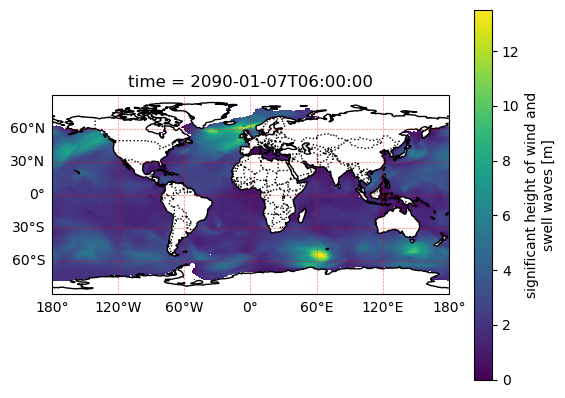

In [8]:


# Create a map projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot the variable
ds.isel(time=50)["hs_1_26"].plot(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis')

# Add features like coastlines, borders, and ocean
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle=':', edgecolor='black')
# ax.add_feature(cartopy.feature.OCEAN)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='red', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Set the title
# plt.title('Wave Height')

# Show the plot
plt.show()

In [9]:
#Change longitude coordinate
def longitude_coverter(lon):
    if lon <0:
        lon=lon+360
    else:
        lon=lon
    return lon

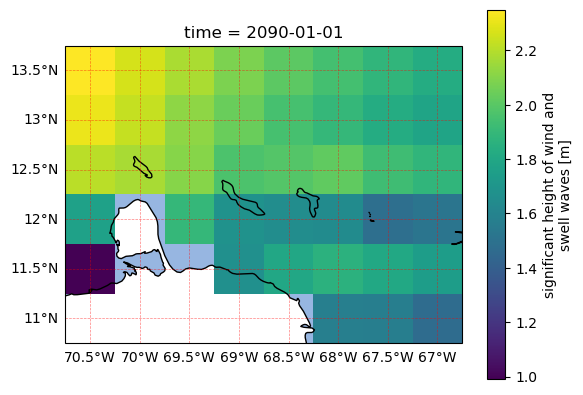

In [10]:

lon_min=-66.985558489
lon_max=-70.897144235

var="hs_1_26"
time_step=0
lat_min=10.641308809
lat_max=13.734711864


# #Change longitude coordinate
# def longitude_coverter(lon_min, lon_max)
#     lon_span=[lon_min,lon_max]

#     for i,lon in enumerate(lon_span):
#         if lon <0:
#             lon_span[i]=lon+360
#         else:
#             lon_span[i]=lon
#     return lon_span

# #Change longitude coordinate
# def longitude_coverter(lon):
#         if lon <0:
#             lon=lon+360
#         else:
#             lon=lon
#         return lon

lon_span=[longitude_coverter(lon_min),longitude_coverter(lon_max)]





# Create a map projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot the variable
ds.isel(time=time_step).sel(longitude=slice(np.min(lon_span),np.max(lon_span)),latitude=slice(lat_min,lat_max))[var].plot(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis')

# Add features like coastlines, borders, and ocean
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle=':', edgecolor='black')
ax.add_feature(cartopy.feature.OCEAN)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='red', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Set the title
# plt.title('Wave Height')

# Show the plot
plt.show()

create a scatterplot

In [11]:
df2=pd.read_csv(r"P:\11209197-018-global-coastal-atlas\MSc_students\ClenmarRowe\Data\All_Datasets\Orig_Datasets\04_Auxillary_files\Arjen_Vector_Template_Netherland_Antilles.csv")
df2.head()

,transect_id,country_id,continent,country_name,Start_lon,Start_lat,Intersect_lon,Intersect_lat,End_lon,End_lat
0,BOX_117_121_0,NLD,Europe,Netherlands,-68.395427,12.295109,-68.401033,12.301967,-68.406639,12.308825
1,BOX_117_121_1,NLD,Europe,Netherlands,-68.398505,12.292725,-68.404540,12.299226,-68.410576,12.305726
2,BOX_117_121_2,NLD,Europe,Netherlands,-68.401179,12.289979,-68.407654,12.296063,-68.414129,12.302147
3,BOX_117_121_3,NLD,Europe,Netherlands,-68.402839,12.287514,-68.410244,12.292483,-68.417649,12.297452
4,BOX_117_121_4,NLD,Europe,Netherlands,-68.403989,12.284926,-68.412179,12.288531,-68.420369,12.292136


In [12]:
longitude_coverter(df2["Intersect_lon"].iloc[0])

291.5989672035

In [33]:
#Filter each each ds for each df
ds_filtered=ds.sel(latitude=12.5,longitude=longitude_coverter(-70),method="nearest")
ds_filtered


ValueError: Dimensions {'method'} do not exist. Expected one or more of FrozenMappingWarningOnValuesAccess({'time': 32136, 'latitude': 361, 'longitude': 720})

In [14]:
# from dask.diagnostics import ProgressBar

# with ProgressBar():
#     ds_filtered2=ds_filtered[var].compute()
# ds_filtered2

In [15]:
# ds_filtered2.to_netcdf(r"Annual maxima test.nc")

In [16]:
ds_filtered2=xr.open_dataset(r"Annual maxima test.nc")
ds_filtered2

<xarray.Dataset>
Dimensions:    (time: 32136)
Coordinates:
    latitude   float32 ...
    longitude  float32 ...
  * time       (time) datetime64[ns] 2090-01-01 ... 2100-12-31T21:00:00
Data variables:
    hs_1_26    (time) float32 ...

In [17]:
variable = ds_filtered2

# Resample the data annually and calculate the maximum value for each year
annual_maxima = variable.resample(time='1Y').max(dim='time')

# Print the annual maxima
annual_maxima

<xarray.Dataset>
Dimensions:    (time: 11)
Coordinates:
    latitude   float32 12.5
    longitude  float32 291.0
  * time       (time) datetime64[ns] 2090-12-31 2091-12-31 ... 2100-12-31
Data variables:
    hs_1_26    (time) float32 3.016 2.8 2.962 3.12 ... 2.994 2.924 2.68 3.524

In [18]:

data=annual_maxima[var].to_numpy()
data

array([3.016    , 2.8000002, 2.9620001, 3.1200001, 2.6940002, 3.0900002,
       2.986    , 2.9940002, 2.924    , 2.68     , 3.5240002],
      dtype=float32)

In [19]:
# # Find the index of the maximum value
# max_index = np.argmax(data2)

# # Drop the maximum value from the data array
# data_without_max = np.delete(data2, max_index)
# data2=data_without_max
# data2

In [20]:
# data=variable[var].to_numpy()
# data

In [21]:
import numpy as np
from scipy.stats import genextreme

# # Example data
# data = np.array([28.01, 29.07, 28.67, 21.57, 21.66, 24.62, 21.45, 28.51,
#                  22.65, 21.57, 20.89, 20.96, 21.05, 22.29, 20.81, 21.08,
#                  20.77, 23.18, 22.98, 21.88, 21.07, 20.74, 22.69, 22.42,
#                  31.81, 25.78, 29.09, 28.11, 22.18, 21.6])

# Fit the GEV distribution to the data
shape, loc, scale = genextreme.fit(data)

# Define the return periods of interest
return_periods = np.array([1.1,5, 10, 20, 50, 100])

# Calculate the return levels for the specified return periods
return_levels = genextreme.isf(1/return_periods, shape, loc, scale)

# Print the return levels
print("Return levels for specified return periods:")
for period, level in zip(return_periods, return_levels):
    print(f"{period}-year return level: {level}")


Return levels for specified return periods:
1.1-year return level: 2.7228261062110297
5.0-year return level: 3.1464298598674683
10.0-year return level: 3.2725186348035247
20.0-year return level: 3.3901217443584812
50.0-year return level: 3.5376304133478875
100.0-year return level: 3.6447819818235447


In [22]:
# data=data2

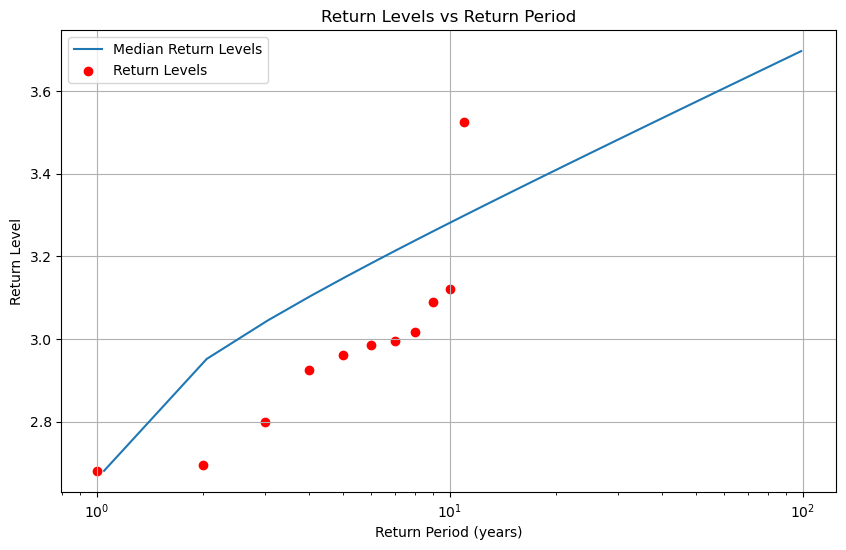

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import genextreme

# # Example data (annual maxima)
# data = np.array([28.01, 29.07, 28.67, 21.57, 21.66, 24.62, 21.45, 28.51,
#                  22.65, 21.57, 20.89, 20.96, 21.05, 22.29, 20.81, 21.08,
#                  20.77, 23.18, 22.98, 21.88, 21.07, 20.74, 22.69, 22.42,
#                  31.81, 25.78, 29.09, 28.11, 22.18, 21.6])

x = np.sort(data)
y = np.arange(1, len(x) + 1)

# Fit the GEV distribution to the data
shape, loc, scale = genextreme.fit(data,0)

# Define the return periods of interest
return_periods = np.array(range(0,100))
return_periods=return_periods+0.05

# Calculate the return levels for the specified return periods
return_levels = genextreme.isf(1/return_periods, shape, loc, scale)

# Example of calculating confidence intervals (using bootstrapping)
# This is a simplified example; actual calculation may require more sophisticated methods
bootstrap_samples = 100
confidence_intervals = np.zeros((bootstrap_samples, len(return_periods)))
# for i in range(bootstrap_samples):
#     bootstrap_data = np.random.choice(data, size=len(data), replace=True)
#     shape_bootstrap, loc_bootstrap, scale_bootstrap = genextreme.fit(bootstrap_data)
#     confidence_intervals[i] = genextreme.isf(1/return_periods, shape_bootstrap, loc_bootstrap, scale_bootstrap)

# # Calculate the median and confidence intervals for each return period
# median_return_levels = np.median(confidence_intervals, axis=0)
# lower_bound = np.percentile(confidence_intervals, 2, axis=0)
# upper_bound = np.percentile(confidence_intervals, 98, axis=0)

# Plotting
plt.figure(figsize=(10, 6))
# plt.plot(return_periods, median_return_levels, '-', label='Median Return Levels')
plt.plot(return_periods, return_levels, '-', label='Median Return Levels')
# plt.fill_between(return_periods, lower_bound, upper_bound, color='gray', alpha=0.2, label='Confidence Intervals')
plt.scatter(y, x, color='red', label='Return Levels')
# plt.scatter(return_periods, return_levels, color='red', label='Return Levels')
plt.xscale('log')
plt.xlabel('Return Period (years)')
plt.ylabel('Return Level')
plt.title('Return Levels vs Return Period')
# plt.ylim(2,4)
plt.legend()
plt.grid(True)
plt.show()


In [24]:
df2=pd.read_csv(r"P:\11209197-018-global-coastal-atlas\MSc_students\ClenmarRowe\Data\All_Datasets\Orig_Datasets\04_Auxillary_files\Arjen_Vector_Template.csv")
df2

,transect_id,country_id,continent,country_name,Start_lon,Start_lat,Intersect_lon,Intersect_lat,End_lon,End_lat
0,BOX_028_183_0,CHL,South America,Chile,-74.386310,-50.377659,-74.390966,-50.382558,-74.395623,-50.387456
1,BOX_028_183_1,CHL,South America,Chile,-74.382469,-50.379144,-74.387125,-50.384042,-74.391782,-50.388940
2,BOX_028_183_2,CHL,South America,Chile,-74.378628,-50.380629,-74.383284,-50.385527,-74.387941,-50.390425
3,BOX_028_183_3,CHL,South America,Chile,-74.373950,-50.382583,-74.379517,-50.387079,-74.385083,-50.391574
4,BOX_028_183_4,CHL,South America,Chile,-74.370425,-50.384358,-74.375991,-50.388853,-74.381558,-50.393348
...,...,...,...,...,...,...,...,...,...,...
1739821,BOX_211_067_149,RUS,Europe,Russia,39.929937,64.701462,39.935198,64.698350,39.940460,64.695238
1739822,BOX_211_067_150,RUS,Europe,Russia,39.933577,64.702586,39.938839,64.699474,39.944100,64.696363
1739823,BOX_211_067_151,RUS,Europe,Russia,39.935546,64.703502,39.942003,64.700833,39.948460,64.698164
1739824,BOX_211_067_152,RUS,Europe,Russia,39.937050,64.704370,39.944697,64.702356,39.952343,64.700341


In [25]:
df2["Lat_ERA5"]=np.nan
df2["Lon_ERA5"]=np.nan
df2


,transect_id,country_id,continent,country_name,Start_lon,Start_lat,Intersect_lon,Intersect_lat,End_lon,End_lat,Lat_ERA5,Lon_ERA5
0,BOX_028_183_0,CHL,South America,Chile,-74.386310,-50.377659,-74.390966,-50.382558,-74.395623,-50.387456,NaN,NaN
1,BOX_028_183_1,CHL,South America,Chile,-74.382469,-50.379144,-74.387125,-50.384042,-74.391782,-50.388940,NaN,NaN
2,BOX_028_183_2,CHL,South America,Chile,-74.378628,-50.380629,-74.383284,-50.385527,-74.387941,-50.390425,NaN,NaN
3,BOX_028_183_3,CHL,South America,Chile,-74.373950,-50.382583,-74.379517,-50.387079,-74.385083,-50.391574,NaN,NaN
4,BOX_028_183_4,CHL,South America,Chile,-74.370425,-50.384358,-74.375991,-50.388853,-74.381558,-50.393348,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1739821,BOX_211_067_149,RUS,Europe,Russia,39.929937,64.701462,39.935198,64.698350,39.940460,64.695238,NaN,NaN
1739822,BOX_211_067_150,RUS,Europe,Russia,39.933577,64.702586,39.938839,64.699474,39.944100,64.696363,NaN,NaN
1739823,BOX_211_067_151,RUS,Europe,Russia,39.935546,64.703502,39.942003,64.700833,39.948460,64.698164,NaN,NaN
1739824,BOX_211_067_152,RUS,Europe,Russia,39.937050,64.704370,39.944697,64.702356,39.952343,64.700341,NaN,NaN


In [26]:
ds

<xarray.Dataset>
Dimensions:    (time: 32136, latitude: 361, longitude: 720)
Coordinates:
  * latitude   (latitude) float32 -90.0 -89.5 -89.0 -88.5 ... 89.0 89.5 90.0
  * longitude  (longitude) float32 0.0 0.5 1.0 1.5 ... 358.0 358.5 359.0 359.5
  * time       (time) datetime64[ns] 2090-01-01 ... 2100-12-31T21:00:00
Data variables:
    hs_1_26    (time, latitude, longitude) float32 dask.array<chunksize=(1, 361, 720), meta=np.ndarray>
    hs_5_85    (time, latitude, longitude) float32 dask.array<chunksize=(1, 361, 720), meta=np.ndarray>
Attributes: (12/36)
    AUTHOR:                        Commonwealth Scientific and Industrial Res...
    CITATION:                      CSIRO. (Year).  2090-2100 CMIP6 EC-EARTH S...
    COMMENT:                       The dataset includes significant wave heig...
    CRS:                           EPSG:4326
    Conventions:                   CF-1.8
    DESCRIPTION:                   The dataset contains projections of signif...
    ...                            ...
    northernmost_latitude:         90.
    product_name:                  ww3.209001_hs.nc
    southernmost_latitude:         -90.
    start_date:                    2090-01-01 00:00:00
    stop_date:                     2090-01-31 21:00:00
    westernmost_longitude:         0.

In [38]:
ds=ds.isel(time=0)[var].to_dataset()
ds

<xarray.Dataset>
Dimensions:    (latitude: 361, longitude: 720)
Coordinates:
  * latitude   (latitude) float32 -90.0 -89.5 -89.0 -88.5 ... 89.0 89.5 90.0
  * longitude  (longitude) float32 0.0 0.5 1.0 1.5 ... 358.0 358.5 359.0 359.5
    time       datetime64[ns] 2090-01-01
Data variables:
    hs_1_26    (latitude, longitude) float32 dask.array<chunksize=(361, 720), meta=np.ndarray>

In [39]:
#Filter each each ds for all points


ds_list=[]
for i in tqdm(df2.index,desc="appending ds_list"):
    ds_filtered=ds.sel(latitude=df2["Intersect_lat"].iloc[i],longitude=longitude_coverter(df2["Intersect_lon"].iloc[i]),method="nearest")
    df2.iloc[i,11]= ds_filtered["longitude"]
    df2.iloc[i,10]= ds_filtered["latitude"]

# Ignore all warnings
# warnings.filterwarnings("ignore")
df2

appending ds_list: 100%|██████████| 1739826/1739826 [37:21<00:00, 776.26it/s]


,transect_id,country_id,continent,country_name,Start_lon,Start_lat,Intersect_lon,Intersect_lat,End_lon,End_lat,Lat_ERA5,Lon_ERA5
0,BOX_028_183_0,CHL,South America,Chile,-74.386310,-50.377659,-74.390966,-50.382558,-74.395623,-50.387456,-50.5,285.5
1,BOX_028_183_1,CHL,South America,Chile,-74.382469,-50.379144,-74.387125,-50.384042,-74.391782,-50.388940,-50.5,285.5
2,BOX_028_183_2,CHL,South America,Chile,-74.378628,-50.380629,-74.383284,-50.385527,-74.387941,-50.390425,-50.5,285.5
3,BOX_028_183_3,CHL,South America,Chile,-74.373950,-50.382583,-74.379517,-50.387079,-74.385083,-50.391574,-50.5,285.5
4,BOX_028_183_4,CHL,South America,Chile,-74.370425,-50.384358,-74.375991,-50.388853,-74.381558,-50.393348,-50.5,285.5
...,...,...,...,...,...,...,...,...,...,...,...,...
1739821,BOX_211_067_149,RUS,Europe,Russia,39.929937,64.701462,39.935198,64.698350,39.940460,64.695238,64.5,40.0
1739822,BOX_211_067_150,RUS,Europe,Russia,39.933577,64.702586,39.938839,64.699474,39.944100,64.696363,64.5,40.0
1739823,BOX_211_067_151,RUS,Europe,Russia,39.935546,64.703502,39.942003,64.700833,39.948460,64.698164,64.5,40.0
1739824,BOX_211_067_152,RUS,Europe,Russia,39.937050,64.704370,39.944697,64.702356,39.952343,64.700341,64.5,40.0


In [40]:
# df2.to_csv(r"P:\11209197-018-global-coastal-atlas\MSc_students\ClenmarRowe\Data\Processed_data\01_Hazards\01_Present\Extreme_wave_height\ERA5 Nearshore\All_Transects_ERA5map\All_Transects_ERA5map.csv")

In [41]:
df2=pd.read_csv(r"P:\11209197-018-global-coastal-atlas\MSc_students\ClenmarRowe\Data\Processed_data\01_Hazards\01_Present\Extreme_wave_height\ERA5 Nearshore\All_Transects_ERA5map\All_Transects_ERA5map.csv")
df2

,Unnamed: 0,transect_id,country_id,continent,country_name,Start_lon,Start_lat,Intersect_lon,Intersect_lat,End_lon,End_lat,Lat_ERA5,Lon_ERA5
0,0,BOX_028_183_0,CHL,South America,Chile,-74.386310,-50.377659,-74.390966,-50.382558,-74.395623,-50.387456,-50.5,285.5
1,1,BOX_028_183_1,CHL,South America,Chile,-74.382469,-50.379144,-74.387125,-50.384042,-74.391782,-50.388940,-50.5,285.5
2,2,BOX_028_183_2,CHL,South America,Chile,-74.378628,-50.380629,-74.383284,-50.385527,-74.387941,-50.390425,-50.5,285.5
3,3,BOX_028_183_3,CHL,South America,Chile,-74.373950,-50.382583,-74.379517,-50.387079,-74.385083,-50.391574,-50.5,285.5
4,4,BOX_028_183_4,CHL,South America,Chile,-74.370425,-50.384358,-74.375991,-50.388853,-74.381558,-50.393348,-50.5,285.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1739821,1739821,BOX_211_067_149,RUS,Europe,Russia,39.929937,64.701462,39.935198,64.698350,39.940460,64.695238,64.5,40.0
1739822,1739822,BOX_211_067_150,RUS,Europe,Russia,39.933577,64.702586,39.938839,64.699474,39.944100,64.696363,64.5,40.0
1739823,1739823,BOX_211_067_151,RUS,Europe,Russia,39.935546,64.703502,39.942003,64.700833,39.948460,64.698164,64.5,40.0
1739824,1739824,BOX_211_067_152,RUS,Europe,Russia,39.937050,64.704370,39.944697,64.702356,39.952343,64.700341,64.5,40.0


In [42]:
df=df2
df

,Unnamed: 0,transect_id,country_id,continent,country_name,Start_lon,Start_lat,Intersect_lon,Intersect_lat,End_lon,End_lat,Lat_ERA5,Lon_ERA5
0,0,BOX_028_183_0,CHL,South America,Chile,-74.386310,-50.377659,-74.390966,-50.382558,-74.395623,-50.387456,-50.5,285.5
1,1,BOX_028_183_1,CHL,South America,Chile,-74.382469,-50.379144,-74.387125,-50.384042,-74.391782,-50.388940,-50.5,285.5
2,2,BOX_028_183_2,CHL,South America,Chile,-74.378628,-50.380629,-74.383284,-50.385527,-74.387941,-50.390425,-50.5,285.5
3,3,BOX_028_183_3,CHL,South America,Chile,-74.373950,-50.382583,-74.379517,-50.387079,-74.385083,-50.391574,-50.5,285.5
4,4,BOX_028_183_4,CHL,South America,Chile,-74.370425,-50.384358,-74.375991,-50.388853,-74.381558,-50.393348,-50.5,285.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1739821,1739821,BOX_211_067_149,RUS,Europe,Russia,39.929937,64.701462,39.935198,64.698350,39.940460,64.695238,64.5,40.0
1739822,1739822,BOX_211_067_150,RUS,Europe,Russia,39.933577,64.702586,39.938839,64.699474,39.944100,64.696363,64.5,40.0
1739823,1739823,BOX_211_067_151,RUS,Europe,Russia,39.935546,64.703502,39.942003,64.700833,39.948460,64.698164,64.5,40.0
1739824,1739824,BOX_211_067_152,RUS,Europe,Russia,39.937050,64.704370,39.944697,64.702356,39.952343,64.700341,64.5,40.0


In [43]:
df["Lat_Lon"]=list(zip(df2["Lat_ERA5"],df2["Lon_ERA5"]))
df

,Unnamed: 0,transect_id,country_id,continent,country_name,Start_lon,Start_lat,Intersect_lon,Intersect_lat,End_lon,End_lat,Lat_ERA5,Lon_ERA5,Lat_Lon
0,0,BOX_028_183_0,CHL,South America,Chile,-74.386310,-50.377659,-74.390966,-50.382558,-74.395623,-50.387456,-50.5,285.5,"(-50.5, 285.5)"
1,1,BOX_028_183_1,CHL,South America,Chile,-74.382469,-50.379144,-74.387125,-50.384042,-74.391782,-50.388940,-50.5,285.5,"(-50.5, 285.5)"
2,2,BOX_028_183_2,CHL,South America,Chile,-74.378628,-50.380629,-74.383284,-50.385527,-74.387941,-50.390425,-50.5,285.5,"(-50.5, 285.5)"
3,3,BOX_028_183_3,CHL,South America,Chile,-74.373950,-50.382583,-74.379517,-50.387079,-74.385083,-50.391574,-50.5,285.5,"(-50.5, 285.5)"
4,4,BOX_028_183_4,CHL,South America,Chile,-74.370425,-50.384358,-74.375991,-50.388853,-74.381558,-50.393348,-50.5,285.5,"(-50.5, 285.5)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1739821,1739821,BOX_211_067_149,RUS,Europe,Russia,39.929937,64.701462,39.935198,64.698350,39.940460,64.695238,64.5,40.0,"(64.5, 40.0)"
1739822,1739822,BOX_211_067_150,RUS,Europe,Russia,39.933577,64.702586,39.938839,64.699474,39.944100,64.696363,64.5,40.0,"(64.5, 40.0)"
1739823,1739823,BOX_211_067_151,RUS,Europe,Russia,39.935546,64.703502,39.942003,64.700833,39.948460,64.698164,64.5,40.0,"(64.5, 40.0)"
1739824,1739824,BOX_211_067_152,RUS,Europe,Russia,39.937050,64.704370,39.944697,64.702356,39.952343,64.700341,64.5,40.0,"(64.5, 40.0)"


In [46]:
# df.to_csv(r"P:\11209197-018-global-coastal-atlas\MSc_students\ClenmarRowe\Data\Processed_data\01_Hazards\01_Present\Extreme_wave_height\ERA5 Nearshore\All_Transects_ERA5map\All_Transects_ERA5map.csv")

In [47]:
df=pd.read_csv(r"P:\11209197-018-global-coastal-atlas\MSc_students\ClenmarRowe\Data\Processed_data\01_Hazards\01_Present\Extreme_wave_height\ERA5 Nearshore\All_Transects_ERA5map\All_Transects_ERA5map.csv")
df

,Unnamed: 0.1,Unnamed: 0,transect_id,country_id,continent,country_name,Start_lon,Start_lat,Intersect_lon,Intersect_lat,End_lon,End_lat,Lat_ERA5,Lon_ERA5,Lat_Lon
0,0,0,BOX_028_183_0,CHL,South America,Chile,-74.386310,-50.377659,-74.390966,-50.382558,-74.395623,-50.387456,-50.5,285.5,"(-50.5, 285.5)"
1,1,1,BOX_028_183_1,CHL,South America,Chile,-74.382469,-50.379144,-74.387125,-50.384042,-74.391782,-50.388940,-50.5,285.5,"(-50.5, 285.5)"
2,2,2,BOX_028_183_2,CHL,South America,Chile,-74.378628,-50.380629,-74.383284,-50.385527,-74.387941,-50.390425,-50.5,285.5,"(-50.5, 285.5)"
3,3,3,BOX_028_183_3,CHL,South America,Chile,-74.373950,-50.382583,-74.379517,-50.387079,-74.385083,-50.391574,-50.5,285.5,"(-50.5, 285.5)"
4,4,4,BOX_028_183_4,CHL,South America,Chile,-74.370425,-50.384358,-74.375991,-50.388853,-74.381558,-50.393348,-50.5,285.5,"(-50.5, 285.5)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1739821,1739821,1739821,BOX_211_067_149,RUS,Europe,Russia,39.929937,64.701462,39.935198,64.698350,39.940460,64.695238,64.5,40.0,"(64.5, 40.0)"
1739822,1739822,1739822,BOX_211_067_150,RUS,Europe,Russia,39.933577,64.702586,39.938839,64.699474,39.944100,64.696363,64.5,40.0,"(64.5, 40.0)"
1739823,1739823,1739823,BOX_211_067_151,RUS,Europe,Russia,39.935546,64.703502,39.942003,64.700833,39.948460,64.698164,64.5,40.0,"(64.5, 40.0)"
1739824,1739824,1739824,BOX_211_067_152,RUS,Europe,Russia,39.937050,64.704370,39.944697,64.702356,39.952343,64.700341,64.5,40.0,"(64.5, 40.0)"


In [44]:
#Find the unique values to prevent recalculations

unique_points=df["Lat_Lon"].unique()
unique_points

array([(-50.5, 285.5), (-50.5, 286.0), (-47.5, 285.0), ..., (64.5, 36.5),
       (64.5, 40.5), (64.5, 37.5)], dtype=object)

In [45]:
len(unique_points)

8258

In [56]:
x_list=[]
y_list=[]

for x,y in tqdm(unique_points,desc="creating dataframe"):
    x_list.append(x)
    y_list.append(y)

df_unique = pd.DataFrame({
    'lat': x_list,
    'lon': y_list,
    'lat_lon': unique_points
})
df_unique

creating dataframe: 100%|██████████| 8258/8258 [00:00<00:00, 824307.16it/s]


,lat,lon,lat_lon
0,-50.5,285.5,"(-50.5, 285.5)"
1,-50.5,286.0,"(-50.5, 286.0)"
2,-47.5,285.0,"(-47.5, 285.0)"
3,-48.5,284.5,"(-48.5, 284.5)"
4,-49.0,284.5,"(-49.0, 284.5)"
...,...,...,...
8253,65.0,37.0,"(65.0, 37.0)"
8254,65.5,40.0,"(65.5, 40.0)"
8255,64.5,36.5,"(64.5, 36.5)"
8256,64.5,40.5,"(64.5, 40.5)"


In [57]:
# df_unique.to_csv(r"P:\11209197-018-global-coastal-atlas\MSc_students\ClenmarRowe\Data\Processed_data\01_Hazards\01_Present\Extreme_wave_height\ERA5 Nearshore\Unique_Points\Unique_Points.csv",index=False)

In [3]:
df_unique=pd.read_csv(r"P:\11209197-018-global-coastal-atlas\MSc_students\ClenmarRowe\Data\Processed_data\01_Hazards\01_Present\Extreme_wave_height\ERA5 Nearshore\Unique_Points\Unique_Points.csv")
df_unique

,lat,lon,lat_lon
0,-50.5,285.5,"(-50.5, 285.5)"
1,-50.5,286.0,"(-50.5, 286.0)"
2,-47.5,285.0,"(-47.5, 285.0)"
3,-48.5,284.5,"(-48.5, 284.5)"
4,-49.0,284.5,"(-49.0, 284.5)"
...,...,...,...
8253,65.0,37.0,"(65.0, 37.0)"
8254,65.5,40.0,"(65.5, 40.0)"
8255,64.5,36.5,"(64.5, 36.5)"
8256,64.5,40.5,"(64.5, 40.5)"


In [4]:
import plotly.express as px

# Assuming you have the DataFrame df_unique as mentioned in your code
# Assuming you have the necessary Mapbox token
px.set_mapbox_access_token('YOUR_MAPBOX_TOKEN')

# Plotting using Plotly Express with Mapbox
fig = px.scatter_mapbox(df_unique, 
                        lat='lat', 
                        lon='lon', 
                        hover_data=['lat_lon'],
                        mapbox_style="carto-positron")
fig.show()

In [5]:
df_unique

,lat,lon,lat_lon
0,-50.5,285.5,"(-50.5, 285.5)"
1,-50.5,286.0,"(-50.5, 286.0)"
2,-47.5,285.0,"(-47.5, 285.0)"
3,-48.5,284.5,"(-48.5, 284.5)"
4,-49.0,284.5,"(-49.0, 284.5)"
...,...,...,...
8253,65.0,37.0,"(65.0, 37.0)"
8254,65.5,40.0,"(65.5, 40.0)"
8255,64.5,36.5,"(64.5, 36.5)"
8256,64.5,40.5,"(64.5, 40.5)"


In [6]:
ds = xr.open_zarr(r"P:\11209197-018-global-coastal-atlas\MSc_students\ClenmarRowe\Data\All_Datasets\Orig_Datasets\01_Hazards\02_Future\Extreme_Wave_Height\GCM_Projection_2090-2100\EC-EARTH_WW3_3Hourly_2090-2100.zarr")
ds

<xarray.Dataset>
Dimensions:    (time: 32136, latitude: 361, longitude: 720)
Coordinates:
  * latitude   (latitude) float32 -90.0 -89.5 -89.0 -88.5 ... 89.0 89.5 90.0
  * longitude  (longitude) float32 0.0 0.5 1.0 1.5 ... 358.0 358.5 359.0 359.5
  * time       (time) datetime64[ns] 2090-01-01 ... 2100-12-31T21:00:00
Data variables:
    hs_1_26    (time, latitude, longitude) float32 dask.array<chunksize=(1, 361, 720), meta=np.ndarray>
    hs_5_85    (time, latitude, longitude) float32 dask.array<chunksize=(1, 361, 720), meta=np.ndarray>
Attributes: (12/36)
    AUTHOR:                        Commonwealth Scientific and Industrial Res...
    CITATION:                      CSIRO. (Year).  2090-2100 CMIP6 EC-EARTH S...
    COMMENT:                       The dataset includes significant wave heig...
    CRS:                           EPSG:4326
    Conventions:                   CF-1.8
    DESCRIPTION:                   The dataset contains projections of signif...
    ...                            ...
    northernmost_latitude:         90.
    product_name:                  ww3.209001_hs.nc
    southernmost_latitude:         -90.
    start_date:                    2090-01-01 00:00:00
    stop_date:                     2090-01-31 21:00:00
    westernmost_longitude:         0.

In [72]:
ds_f=ds.sel(latitude=df_unique.iloc[0,0])
ds_f

<xarray.Dataset>
Dimensions:    (time: 32136, longitude: 720)
Coordinates:
    latitude   float32 -50.5
  * longitude  (longitude) float32 0.0 0.5 1.0 1.5 ... 358.0 358.5 359.0 359.5
  * time       (time) datetime64[ns] 2090-01-01 ... 2100-12-31T21:00:00
Data variables:
    hs_1_26    (time, longitude) float32 dask.array<chunksize=(1, 720), meta=np.ndarray>
    hs_5_85    (time, longitude) float32 dask.array<chunksize=(1, 720), meta=np.ndarray>
Attributes: (12/36)
    AUTHOR:                        Commonwealth Scientific and Industrial Res...
    CITATION:                      CSIRO. (Year).  2090-2100 CMIP6 EC-EARTH S...
    COMMENT:                       The dataset includes significant wave heig...
    CRS:                           EPSG:4326
    Conventions:                   CF-1.8
    DESCRIPTION:                   The dataset contains projections of signif...
    ...                            ...
    northernmost_latitude:         90.
    product_name:                  ww3.209001_hs.nc
    southernmost_latitude:         -90.
    start_date:                    2090-01-01 00:00:00
    stop_date:                     2090-01-31 21:00:00
    westernmost_longitude:         0.

In [76]:
len(df_unique["lon"].unique())

672

In [75]:
len(df_unique["lat"].unique())

247

In [78]:
df_unique["lon"].values

array([285.5, 286. , 285. , ...,  36.5,  40.5,  37.5])

In [7]:
selected_lons = df_unique["lon"].values
selected_lats = df_unique["lat"].values

# Selecting data based on specific coordinates
subset_data_coordinates = ds.sel(longitude=selected_lons, latitude=selected_lats)
subset_data_coordinates

<xarray.Dataset>
Dimensions:    (time: 32136, latitude: 8258, longitude: 8258)
Coordinates:
  * latitude   (latitude) float32 -50.5 -50.5 -47.5 -48.5 ... 64.5 64.5 64.5
  * longitude  (longitude) float32 285.5 286.0 285.0 284.5 ... 36.5 40.5 37.5
  * time       (time) datetime64[ns] 2090-01-01 ... 2100-12-31T21:00:00
Data variables:
    hs_1_26    (time, latitude, longitude) float32 dask.array<chunksize=(1, 8258, 8258), meta=np.ndarray>
    hs_5_85    (time, latitude, longitude) float32 dask.array<chunksize=(1, 8258, 8258), meta=np.ndarray>
Attributes: (12/36)
    AUTHOR:                        Commonwealth Scientific and Industrial Res...
    CITATION:                      CSIRO. (Year).  2090-2100 CMIP6 EC-EARTH S...
    COMMENT:                       The dataset includes significant wave heig...
    CRS:                           EPSG:4326
    Conventions:                   CF-1.8
    DESCRIPTION:                   The dataset contains projections of signif...
    ...                            ...
    northernmost_latitude:         90.
    product_name:                  ww3.209001_hs.nc
    southernmost_latitude:         -90.
    start_date:                    2090-01-01 00:00:00
    stop_date:                     2090-01-31 21:00:00
    westernmost_longitude:         0.

In [8]:
# Resample the data annually and calculate the maximum value for each year
annual_maxima = subset_data_coordinates.resample(time='1Y').max(dim='time')

# Print the annual maxima
annual_maxima

<xarray.Dataset>
Dimensions:    (time: 11, latitude: 8258, longitude: 8258)
Coordinates:
  * latitude   (latitude) float32 -50.5 -50.5 -47.5 -48.5 ... 64.5 64.5 64.5
  * longitude  (longitude) float32 285.5 286.0 285.0 284.5 ... 36.5 40.5 37.5
  * time       (time) datetime64[ns] 2090-12-31 2091-12-31 ... 2100-12-31
Data variables:
    hs_1_26    (time, latitude, longitude) float32 dask.array<chunksize=(1, 8258, 8258), meta=np.ndarray>
    hs_5_85    (time, latitude, longitude) float32 dask.array<chunksize=(1, 8258, 8258), meta=np.ndarray>
Attributes: (12/36)
    AUTHOR:                        Commonwealth Scientific and Industrial Res...
    CITATION:                      CSIRO. (Year).  2090-2100 CMIP6 EC-EARTH S...
    COMMENT:                       The dataset includes significant wave heig...
    CRS:                           EPSG:4326
    Conventions:                   CF-1.8
    DESCRIPTION:                   The dataset contains projections of signif...
    ...                            ...
    northernmost_latitude:         90.
    product_name:                  ww3.209001_hs.nc
    southernmost_latitude:         -90.
    start_date:                    2090-01-01 00:00:00
    stop_date:                     2090-01-31 21:00:00
    westernmost_longitude:         0.

In [14]:
# Slicing the dataset to select a subset
annual_maxima_1 = annual_maxima.isel(latitude=slice(None, len(selected_lats)//2), 
                                     longitude=slice(None, len(selected_lons)//2))
annual_maxima_1

<xarray.Dataset>
Dimensions:    (time: 11, latitude: 4129, longitude: 4129)
Coordinates:
  * latitude   (latitude) float32 -50.5 -50.5 -47.5 -48.5 ... 3.5 3.0 1.5 2.0
  * longitude  (longitude) float32 285.5 286.0 285.0 284.5 ... 173.0 173.0 173.5
  * time       (time) datetime64[ns] 2090-12-31 2091-12-31 ... 2100-12-31
Data variables:
    hs_1_26    (time, latitude, longitude) float32 dask.array<chunksize=(1, 4129, 4129), meta=np.ndarray>
    hs_5_85    (time, latitude, longitude) float32 dask.array<chunksize=(1, 4129, 4129), meta=np.ndarray>
Attributes: (12/36)
    AUTHOR:                        Commonwealth Scientific and Industrial Res...
    CITATION:                      CSIRO. (Year).  2090-2100 CMIP6 EC-EARTH S...
    COMMENT:                       The dataset includes significant wave heig...
    CRS:                           EPSG:4326
    Conventions:                   CF-1.8
    DESCRIPTION:                   The dataset contains projections of signif...
    ...                            ...
    northernmost_latitude:         90.
    product_name:                  ww3.209001_hs.nc
    southernmost_latitude:         -90.
    start_date:                    2090-01-01 00:00:00
    stop_date:                     2090-01-31 21:00:00
    westernmost_longitude:         0.

In [18]:
annual_maxima_2 = annual_maxima.isel(latitude=slice(len(selected_lats)//2,len(selected_lats)), 
                                     longitude=slice(None, len(selected_lons)//2))
annual_maxima_2


<xarray.Dataset>
Dimensions:    (time: 11, latitude: 4129, longitude: 4129)
Coordinates:
  * latitude   (latitude) float32 0.0 1.0 3.5 0.5 3.0 ... 65.5 64.5 64.5 64.5
  * longitude  (longitude) float32 285.5 286.0 285.0 284.5 ... 173.0 173.0 173.5
  * time       (time) datetime64[ns] 2090-12-31 2091-12-31 ... 2100-12-31
Data variables:
    hs_1_26    (time, latitude, longitude) float32 dask.array<chunksize=(1, 4129, 4129), meta=np.ndarray>
    hs_5_85    (time, latitude, longitude) float32 dask.array<chunksize=(1, 4129, 4129), meta=np.ndarray>
Attributes: (12/36)
    AUTHOR:                        Commonwealth Scientific and Industrial Res...
    CITATION:                      CSIRO. (Year).  2090-2100 CMIP6 EC-EARTH S...
    COMMENT:                       The dataset includes significant wave heig...
    CRS:                           EPSG:4326
    Conventions:                   CF-1.8
    DESCRIPTION:                   The dataset contains projections of signif...
    ...                            ...
    northernmost_latitude:         90.
    product_name:                  ww3.209001_hs.nc
    southernmost_latitude:         -90.
    start_date:                    2090-01-01 00:00:00
    stop_date:                     2090-01-31 21:00:00
    westernmost_longitude:         0.

In [19]:
annual_maxima_3 = annual_maxima.isel(latitude=slice(None, len(selected_lats)//2), 
                                     longitude=slice(len(selected_lons)//2,len(selected_lons)))
annual_maxima_3

<xarray.Dataset>
Dimensions:    (time: 11, latitude: 4129, longitude: 4129)
Coordinates:
  * latitude   (latitude) float32 -50.5 -50.5 -47.5 -48.5 ... 3.5 3.0 1.5 2.0
  * longitude  (longitude) float32 173.5 173.0 173.0 174.0 ... 36.5 40.5 37.5
  * time       (time) datetime64[ns] 2090-12-31 2091-12-31 ... 2100-12-31
Data variables:
    hs_1_26    (time, latitude, longitude) float32 dask.array<chunksize=(1, 4129, 4129), meta=np.ndarray>
    hs_5_85    (time, latitude, longitude) float32 dask.array<chunksize=(1, 4129, 4129), meta=np.ndarray>
Attributes: (12/36)
    AUTHOR:                        Commonwealth Scientific and Industrial Res...
    CITATION:                      CSIRO. (Year).  2090-2100 CMIP6 EC-EARTH S...
    COMMENT:                       The dataset includes significant wave heig...
    CRS:                           EPSG:4326
    Conventions:                   CF-1.8
    DESCRIPTION:                   The dataset contains projections of signif...
    ...                            ...
    northernmost_latitude:         90.
    product_name:                  ww3.209001_hs.nc
    southernmost_latitude:         -90.
    start_date:                    2090-01-01 00:00:00
    stop_date:                     2090-01-31 21:00:00
    westernmost_longitude:         0.

In [20]:
annual_maxima_4 = annual_maxima.isel(latitude=slice(len(selected_lats)//2,len(selected_lats)), 
                                     longitude=slice(len(selected_lons)//2,len(selected_lons)))
annual_maxima_4


<xarray.Dataset>
Dimensions:    (time: 11, latitude: 4129, longitude: 4129)
Coordinates:
  * latitude   (latitude) float32 0.0 1.0 3.5 0.5 3.0 ... 65.5 64.5 64.5 64.5
  * longitude  (longitude) float32 173.5 173.0 173.0 174.0 ... 36.5 40.5 37.5
  * time       (time) datetime64[ns] 2090-12-31 2091-12-31 ... 2100-12-31
Data variables:
    hs_1_26    (time, latitude, longitude) float32 dask.array<chunksize=(1, 4129, 4129), meta=np.ndarray>
    hs_5_85    (time, latitude, longitude) float32 dask.array<chunksize=(1, 4129, 4129), meta=np.ndarray>
Attributes: (12/36)
    AUTHOR:                        Commonwealth Scientific and Industrial Res...
    CITATION:                      CSIRO. (Year).  2090-2100 CMIP6 EC-EARTH S...
    COMMENT:                       The dataset includes significant wave heig...
    CRS:                           EPSG:4326
    Conventions:                   CF-1.8
    DESCRIPTION:                   The dataset contains projections of signif...
    ...                            ...
    northernmost_latitude:         90.
    product_name:                  ww3.209001_hs.nc
    southernmost_latitude:         -90.
    start_date:                    2090-01-01 00:00:00
    stop_date:                     2090-01-31 21:00:00
    westernmost_longitude:         0.

In [21]:
from dask.diagnostics import ProgressBar
with ProgressBar():
    annual_maxima_unchunked_1=annual_maxima_1.compute()
annual_maxima_unchunked_1

[                                        ] | 0% Completed | 13.89 sms

c:\Users\rowe\AppData\Local\miniconda3\envs\coclico\Lib\site-packages\dask\array\reductions.py:654: RuntimeWarning:

All-NaN slice encountered



[########################################] | 100% Completed | 6hr 9ms


<xarray.Dataset>
Dimensions:    (time: 11, latitude: 4129, longitude: 4129)
Coordinates:
  * latitude   (latitude) float32 -50.5 -50.5 -47.5 -48.5 ... 3.5 3.0 1.5 2.0
  * longitude  (longitude) float32 285.5 286.0 285.0 284.5 ... 173.0 173.0 173.5
  * time       (time) datetime64[ns] 2090-12-31 2091-12-31 ... 2100-12-31
Data variables:
    hs_1_26    (time, latitude, longitude) float32 nan nan nan ... 2.102 2.906
    hs_5_85    (time, latitude, longitude) float32 nan nan nan ... 2.172 3.014
Attributes: (12/36)
    AUTHOR:                        Commonwealth Scientific and Industrial Res...
    CITATION:                      CSIRO. (Year).  2090-2100 CMIP6 EC-EARTH S...
    COMMENT:                       The dataset includes significant wave heig...
    CRS:                           EPSG:4326
    Conventions:                   CF-1.8
    DESCRIPTION:                   The dataset contains projections of signif...
    ...                            ...
    northernmost_latitude:         90.
    product_name:                  ww3.209001_hs.nc
    southernmost_latitude:         -90.
    start_date:                    2090-01-01 00:00:00
    stop_date:                     2090-01-31 21:00:00
    westernmost_longitude:         0.

In [22]:
# annual_maxima_unchunked_1.to_netcdf(r"P:\11209197-018-global-coastal-atlas\MSc_students\ClenmarRowe\Data\Processed_data\01_Hazards\01_Present\Extreme_wave_height\ERA5 Nearshore\EVA\EVA_2090_2100_part1.nc")

In [ ]:

data=annual_maxima[var].to_numpy()
data

array([3.016    , 2.8000002, 2.9620001, 3.1200001, 2.6940002, 3.0900002,
       2.986    , 2.9940002, 2.924    , 2.68     , 3.5240002],
      dtype=float32)

In [ ]:
import numpy as np
from scipy.stats import genextreme

# # Example data
# data = np.array([28.01, 29.07, 28.67, 21.57, 21.66, 24.62, 21.45, 28.51,
#                  22.65, 21.57, 20.89, 20.96, 21.05, 22.29, 20.81, 21.08,
#                  20.77, 23.18, 22.98, 21.88, 21.07, 20.74, 22.69, 22.42,
#                  31.81, 25.78, 29.09, 28.11, 22.18, 21.6])

# Fit the GEV distribution to the data
shape, loc, scale = genextreme.fit(data)

# Define the return periods of interest
return_periods = np.array([1.1,5, 10, 20, 50, 100])

# Calculate the return levels for the specified return periods
return_levels = genextreme.isf(1/return_periods, shape, loc, scale)

# Print the return levels
print("Return levels for specified return periods:")
for period, level in zip(return_periods, return_levels):
    print(f"{period}-year return level: {level}")


Return levels for specified return periods:
1.1-year return level: 2.7228261062110297
5.0-year return level: 3.1464298598674683
10.0-year return level: 3.2725186348035247
20.0-year return level: 3.3901217443584812
50.0-year return level: 3.5376304133478875
100.0-year return level: 3.6447819818235447


In [73]:
from dask.diagnostics import ProgressBar
with ProgressBar():
    ds_filtered=ds_f.compute()
ds_filtered

[########################################] | 100% Completed | 11m 11s


<xarray.Dataset>
Dimensions:    (time: 32136, longitude: 720)
Coordinates:
    latitude   float32 -50.5
  * longitude  (longitude) float32 0.0 0.5 1.0 1.5 ... 358.0 358.5 359.0 359.5
  * time       (time) datetime64[ns] 2090-01-01 ... 2100-12-31T21:00:00
Data variables:
    hs_1_26    (time, longitude) float32 2.574 2.638 2.72 ... 3.938 3.986 4.018
    hs_5_85    (time, longitude) float32 4.84 4.754 4.68 ... 5.63 5.646 5.65
Attributes: (12/36)
    AUTHOR:                        Commonwealth Scientific and Industrial Res...
    CITATION:                      CSIRO. (Year).  2090-2100 CMIP6 EC-EARTH S...
    COMMENT:                       The dataset includes significant wave heig...
    CRS:                           EPSG:4326
    Conventions:                   CF-1.8
    DESCRIPTION:                   The dataset contains projections of signif...
    ...                            ...
    northernmost_latitude:         90.
    product_name:                  ww3.209001_hs.nc
    southernmost_latitude:         -90.
    start_date:                    2090-01-01 00:00:00
    stop_date:                     2090-01-31 21:00:00
    westernmost_longitude:         0.

In [25]:
from dask.diagnostics import ProgressBar

perc_95=[]
vars=["hs_1_26","hs_5_85"]
for j,var in enumerate(vars):
    for x,y in tqdm(unique_points,desc="calculating percentile"):
        ds_unchunk = ds[var].sel(latitude=x,longitude=y).chunk(dict(time=-1))
        quan=ds_unchunk.quantile(0.95, dim='time')
        perc_95.append(quan)
    perc_95

    
    unique_hs=[]
    for i,hs in tqdm(enumerate(perc_95)):
        with ProgressBar():
            unique_hs.append(hs.compute())

    
    if j==0:
        unique_hs_1_26_values= [da.values for da in unique_hs]
    else:
        unique_hs_5_85_values= [da.values for da in unique_hs]

calculating percentile:   0%|          | 0/6 [00:00<?, ?it/s]

calculating percentile: 100%|██████████| 6/6 [00:01<00:00,  3.97it/s]
0it [00:00, ?it/s]

[########################################] | 100% Completed | 24m 39s


1it [24:42, 1482.00s/it]

[########################################] | 100% Completed | 26m 11s


2it [50:55, 1535.65s/it]

[########################################] | 100% Completed | 31m 0ss


3it [1:21:57, 1684.95s/it]

[########################################] | 100% Completed | 27m 47s


4it [1:49:47, 1678.89s/it]

[########################################] | 100% Completed | 28m 30s


5it [2:18:20, 1691.26s/it]

[########################################] | 100% Completed | 28m 58s


6it [2:47:21, 1673.61s/it]
calculating percentile: 100%|██████████| 6/6 [00:01<00:00,  3.75it/s]
0it [00:00, ?it/s]

[########################################] | 100% Completed | 28m 40s


1it [28:42, 1722.18s/it]

[########################################] | 100% Completed | 27m 44s


2it [56:28, 1689.61s/it]

[########################################] | 100% Completed | 24m 36s


3it [1:21:08, 1593.53s/it]

[########################################] | 100% Completed | 29m 48s


4it [1:50:59, 1671.58s/it]

[########################################] | 100% Completed | 30m 7ss


5it [2:21:08, 1721.22s/it]

[########################################] | 100% Completed | 27m 8ss


6it [2:48:19, 1690.47s/it]

[########################################] | 100% Completed | 24m 45s


7it [3:13:07, 1624.41s/it]

[########################################] | 100% Completed | 20m 47s


8it [3:33:57, 1505.22s/it]

[########################################] | 100% Completed | 21m 7ss


9it [3:55:07, 1431.70s/it]

[########################################] | 100% Completed | 13m 39s


10it [4:08:50, 1243.56s/it]

[########################################] | 100% Completed | 14m 12s


11it [4:23:04, 1124.54s/it]

[########################################] | 100% Completed | 13m 45s


12it [4:36:52, 1384.40s/it]


In [26]:
unique_df = pd.DataFrame({
  'unique_points': unique_points,
  'unique_hs_1_26': unique_hs_1_26_values,
  'unique_hs_5_85': unique_hs_5_85_values[6:]
})
unique_df


,unique_points,unique_hs_1_26,unique_hs_5_85
0,"(12.5, 291.5)",2.368000030517578,2.4220001697540283
1,"(12.0, 291.0)",1.9820001125335693,2.0420000553131104
2,"(12.5, 291.0)",2.2760000228881836,2.3380000591278076
3,"(12.0, 292.0)",2.070000171661377,2.1105000972747803
4,"(12.5, 290.0)",2.4100000858306885,2.51200008392334
5,"(12.0, 291.5)",2.0340001583099365,2.080000162124634


In [27]:

unique_df.to_csv(r'F:\Deltares laptop\unique_netherland_antilles_GCM_90-100.csv', index=False)

In [28]:
df

,transect_id,country_id,continent,country_name,Start_lon,Start_lat,Intersect_lon,Intersect_lat,End_lon,End_lat,Lat_ERA5,Lon_ERA5,Lat_Lon
0,BOX_117_121_0,NLD,Europe,Netherlands,-68.395427,12.295109,-68.401033,12.301967,-68.406639,12.308825,12.5,291.5,"(12.5, 291.5)"
1,BOX_117_121_1,NLD,Europe,Netherlands,-68.398505,12.292725,-68.404540,12.299226,-68.410576,12.305726,12.5,291.5,"(12.5, 291.5)"
2,BOX_117_121_2,NLD,Europe,Netherlands,-68.401179,12.289979,-68.407654,12.296063,-68.414129,12.302147,12.5,291.5,"(12.5, 291.5)"
3,BOX_117_121_3,NLD,Europe,Netherlands,-68.402839,12.287514,-68.410244,12.292483,-68.417649,12.297452,12.5,291.5,"(12.5, 291.5)"
4,BOX_117_121_4,NLD,Europe,Netherlands,-68.403989,12.284926,-68.412179,12.288531,-68.420369,12.292136,12.5,291.5,"(12.5, 291.5)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,BOX_117_117_139,NLD,Europe,Netherlands,-68.301764,12.158128,-68.300464,12.166817,-68.299164,12.175506,12.0,291.5,"(12.0, 291.5)"
619,BOX_117_117_140,NLD,Europe,Netherlands,-68.306208,12.158764,-68.304908,12.167453,-68.303608,12.176142,12.0,291.5,"(12.0, 291.5)"
620,BOX_117_117_141,NLD,Europe,Netherlands,-68.309252,12.158884,-68.309381,12.167664,-68.309510,12.176445,12.0,291.5,"(12.0, 291.5)"
621,BOX_117_117_142,NLD,Europe,Netherlands,-68.313743,12.158821,-68.313872,12.167601,-68.314001,12.176382,12.0,291.5,"(12.0, 291.5)"


In [29]:
# Merge df_template with unique_df on the "unique_points" column
merged_df = pd.merge(df, unique_df, left_on="Lat_Lon", right_on="unique_points", how="left")
merged_df  .rename(columns={'Lat_ERA5': 'Lat_GCM_90-100', 'Lon_ERA5': 'Lon_GCM_90-100', 'unique_hs_1_26': 'Hs_1_26_EC-EARTH-WW3_90-100', 'unique_hs_5_85': 'Hs_5_85_EC-EARTH-WW3_90-100'}, inplace=True)

merged_df

,transect_id,country_id,continent,country_name,Start_lon,Start_lat,Intersect_lon,Intersect_lat,End_lon,End_lat,Lat_GCM_90-100,Lon_GCM_90-100,Lat_Lon,unique_points,Hs_1_26_EC-EARTH-WW3_90-100,Hs_5_85_EC-EARTH-WW3_90-100
0,BOX_117_121_0,NLD,Europe,Netherlands,-68.395427,12.295109,-68.401033,12.301967,-68.406639,12.308825,12.5,291.5,"(12.5, 291.5)","(12.5, 291.5)",2.368000030517578,2.4220001697540283
1,BOX_117_121_1,NLD,Europe,Netherlands,-68.398505,12.292725,-68.404540,12.299226,-68.410576,12.305726,12.5,291.5,"(12.5, 291.5)","(12.5, 291.5)",2.368000030517578,2.4220001697540283
2,BOX_117_121_2,NLD,Europe,Netherlands,-68.401179,12.289979,-68.407654,12.296063,-68.414129,12.302147,12.5,291.5,"(12.5, 291.5)","(12.5, 291.5)",2.368000030517578,2.4220001697540283
3,BOX_117_121_3,NLD,Europe,Netherlands,-68.402839,12.287514,-68.410244,12.292483,-68.417649,12.297452,12.5,291.5,"(12.5, 291.5)","(12.5, 291.5)",2.368000030517578,2.4220001697540283
4,BOX_117_121_4,NLD,Europe,Netherlands,-68.403989,12.284926,-68.412179,12.288531,-68.420369,12.292136,12.5,291.5,"(12.5, 291.5)","(12.5, 291.5)",2.368000030517578,2.4220001697540283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,BOX_117_117_139,NLD,Europe,Netherlands,-68.301764,12.158128,-68.300464,12.166817,-68.299164,12.175506,12.0,291.5,"(12.0, 291.5)","(12.0, 291.5)",2.0340001583099365,2.080000162124634
619,BOX_117_117_140,NLD,Europe,Netherlands,-68.306208,12.158764,-68.304908,12.167453,-68.303608,12.176142,12.0,291.5,"(12.0, 291.5)","(12.0, 291.5)",2.0340001583099365,2.080000162124634
620,BOX_117_117_141,NLD,Europe,Netherlands,-68.309252,12.158884,-68.309381,12.167664,-68.309510,12.176445,12.0,291.5,"(12.0, 291.5)","(12.0, 291.5)",2.0340001583099365,2.080000162124634
621,BOX_117_117_142,NLD,Europe,Netherlands,-68.313743,12.158821,-68.313872,12.167601,-68.314001,12.176382,12.0,291.5,"(12.0, 291.5)","(12.0, 291.5)",2.0340001583099365,2.080000162124634


In [30]:


merged_df.to_csv(r'F:\Deltares laptop\merged_netherland_antilles_GCM_90-100.csv', index=False)

In [34]:
df_master=pd.read_csv(r'F:\Deltares laptop\merged_netherland_antilles_GCM_90-100.csv')
df_master["Lat_GCM_90-100+0.01"]=df_master["Lat_GCM_90-100"]+0.02
df_master.head()

,transect_id,country_id,continent,country_name,Start_lon,Start_lat,Intersect_lon,Intersect_lat,End_lon,End_lat,Lat_GCM_90-100,Lon_GCM_90-100,Lat_Lon,unique_points,Hs_1_26_EC-EARTH-WW3_90-100,Hs_5_85_EC-EARTH-WW3_90-100,Lat_GCM_90-100+0.01
0,BOX_117_121_0,NLD,Europe,Netherlands,-68.395427,12.295109,-68.401033,12.301967,-68.406639,12.308825,12.5,291.5,"(12.5, 291.5)","(12.5, 291.5)",2.368,2.422,12.52
1,BOX_117_121_1,NLD,Europe,Netherlands,-68.398505,12.292725,-68.404540,12.299226,-68.410576,12.305726,12.5,291.5,"(12.5, 291.5)","(12.5, 291.5)",2.368,2.422,12.52
2,BOX_117_121_2,NLD,Europe,Netherlands,-68.401179,12.289979,-68.407654,12.296063,-68.414129,12.302147,12.5,291.5,"(12.5, 291.5)","(12.5, 291.5)",2.368,2.422,12.52
3,BOX_117_121_3,NLD,Europe,Netherlands,-68.402839,12.287514,-68.410244,12.292483,-68.417649,12.297452,12.5,291.5,"(12.5, 291.5)","(12.5, 291.5)",2.368,2.422,12.52
4,BOX_117_121_4,NLD,Europe,Netherlands,-68.403989,12.284926,-68.412179,12.288531,-68.420369,12.292136,12.5,291.5,"(12.5, 291.5)","(12.5, 291.5)",2.368,2.422,12.52


In [36]:


# Create the initial scatter mapbox plot
fig2 = px.scatter_mapbox(df_master,
                         lat='Lat_GCM_90-100',  
                         lon='Lon_GCM_90-100',  
                         hover_name='Lat_Lon',  
                         color='Hs_1_26_EC-EARTH-WW3_90-100',
                        #  marker=dict(size=1),
                         zoom=8,  
                         center={'lat':  12.15, 'lon': -69},  
                         width=1100,  
                         height=550,
                         title="EC-EARTH/WW3 wave heights and corresponding transects")


fig3 = px.scatter_mapbox(df_master,
                         lat='Intersect_lat',  
                         lon='Intersect_lon',  
                         hover_name='transect_id',  
                         color='Hs_1_26_EC-EARTH-WW3_90-100')

fig4 = px.scatter_mapbox(df_master,
                         lat='Lat_GCM_90-100+0.01',  
                         lon='Lon_GCM_90-100',  
                         hover_name='Lat_Lon',  
                         color='Hs_5_85_EC-EARTH-WW3_90-100')

fig2.add_trace(fig3.data[0]) 
fig2.add_trace(fig4.data[0]) 

# fig2.update_traces(name='Shoreline Transects', selector=dict(type='scattermapbox'))
# Update the layout
fig2.update_layout(title="Era5 wave heights and corresponding transects",mapbox_style="carto-positron", margin=dict(l=0,r=0,b=0,t=0), showlegend=True)


# Display the plot
fig2.show()
